In [1]:
import yfinance as yf
import os
import sys

sys.path.append(os.path.abspath('../scripts'))
sys.path.append(os.path.abspath('../src'))
sys.path.append(os.path.abspath('../models'))

# Load Tesla data
tsla_data = yf.download('TSLA', start='2010-01-01', end='2023-12-31')['Adj Close']
BND_data = yf.download('BND', start='2010-01-01', end='2023-12-31')['Adj Close']
SPY_data = yf.download('SPY', start='2010-01-01', end='2023-12-31')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


inintantiate the class

In [2]:
tsla_data

Ticker,TSLA
Date,
2010-06-29 00:00:00+00:00,1.592667
2010-06-30 00:00:00+00:00,1.588667
2010-07-01 00:00:00+00:00,1.464000
2010-07-02 00:00:00+00:00,1.280000
2010-07-06 00:00:00+00:00,1.074000
...,...
2023-12-22 00:00:00+00:00,252.539993
2023-12-26 00:00:00+00:00,256.609985
2023-12-27 00:00:00+00:00,261.440002


split the data

In [3]:
from TimeSeriesForecast import TimeSeriesForecast


In [4]:
TimeSeriesForecast_tsla = TimeSeriesForecast(tsla_data)
TimeSeriesForecast_bnd = TimeSeriesForecast(BND_data)
TimeSeriesForecast_spy = TimeSeriesForecast(SPY_data)

Data split into 2720 training samples and 680 testing samples.
Data split into 2817 training samples and 705 testing samples.
Data split into 2817 training samples and 705 testing samples.


In [5]:
TimeSeriesForecast_tsla.preprocess_for_lstm()
TimeSeriesForecast_spy.preprocess_for_lstm()
TimeSeriesForecast_bnd.preprocess_for_lstm()

Data preprocessed for LSTM model.
Data preprocessed for LSTM model.
Data preprocessed for LSTM model.


In [6]:
test_data = TimeSeriesForecast_tsla.split_data()
test_data_spy = TimeSeriesForecast_spy.split_data()
test_data_bnd =  TimeSeriesForecast_bnd.split_data()

Data split into 2720 training samples and 680 testing samples.
Data split into 2817 training samples and 705 testing samples.
Data split into 2817 training samples and 705 testing samples.


In [7]:
test_data_tsla = test_data[1]
test_data_tsla

Ticker,TSLA
Date,
2021-04-20 00:00:00+00:00,239.663330
2021-04-21 00:00:00+00:00,248.039993
2021-04-22 00:00:00+00:00,239.896667
2021-04-23 00:00:00+00:00,243.133331
2021-04-26 00:00:00+00:00,246.066666
...,...
2023-12-22 00:00:00+00:00,252.539993
2023-12-26 00:00:00+00:00,256.609985
2023-12-27 00:00:00+00:00,261.440002


In [8]:
test_data_spy = test_data_spy[1] 
test_data_spy




Ticker,SPY
Date,
2021-03-15 00:00:00+00:00,375.644806
2021-03-16 00:00:00+00:00,375.171021
2021-03-17 00:00:00+00:00,376.450317
2021-03-18 00:00:00+00:00,370.973145
2021-03-19 00:00:00+00:00,370.286621
...,...
2023-12-22 00:00:00+00:00,469.225250
2023-12-26 00:00:00+00:00,471.206543
2023-12-27 00:00:00+00:00,472.058533


In [9]:
test_data_bnd = test_data_bnd[1]
test_data_bnd

Ticker,BND
Date,
2021-03-15 00:00:00+00:00,76.596260
2021-03-16 00:00:00+00:00,76.587219
2021-03-17 00:00:00+00:00,76.560097
2021-03-18 00:00:00+00:00,76.243767
2021-03-19 00:00:00+00:00,76.307022
...,...
2023-12-22 00:00:00+00:00,71.401619
2023-12-26 00:00:00+00:00,71.469742
2023-12-27 00:00:00+00:00,71.927193


In [10]:
lstm_model_tsla = TimeSeriesForecast.load_lstm_model(r'C:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\models\lstm_model_for_tesla.keras')
lstm_model_spy = TimeSeriesForecast.load_lstm_model(r'C:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\models\lstm_model_for_spy.keras')
lstm_model_bnd = TimeSeriesForecast.load_lstm_model(r'C:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\models\lstm_model_for_bnd.keras')

LSTM model loaded from C:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\models\lstm_model_for_tesla.keras
LSTM model loaded from C:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\models\lstm_model_for_spy.keras
LSTM model loaded from C:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\models\lstm_model_for_bnd.keras


In [11]:
from Future_Market_Trends import FutureMarketForecast

In [21]:
FutureMarketForecast_tesla= FutureMarketForecast(lstm_model_tsla ,tsla_data,test_data_tsla,input_shape = 60)
FutureMarketForecast_spy = FutureMarketForecast(lstm_model_spy ,SPY_data,test_data_spy,input_shape = 60)
FutureMarketForecast_bnd = FutureMarketForecast(lstm_model_bnd,BND_data,test_data_bnd,input_shape = 60)

In [13]:
forcastet_tsla_data = FutureMarketForecast_tesla.forecast_future(periods=180)
forcastet_spy_data = FutureMarketForecast_spy.forecast_future(periods=180)
forcastet_bnd_data = FutureMarketForecast_bnd.forecast_future(periods=180)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━

In [14]:
forcastet_tsla_data


,Forecast
2024-01-01 00:00:00+00:00,3.945905
2024-01-02 00:00:00+00:00,3.741421
2024-01-03 00:00:00+00:00,3.674153
2024-01-04 00:00:00+00:00,3.631999
2024-01-05 00:00:00+00:00,3.611153
...,...
2024-09-02 00:00:00+00:00,1.038333
2024-09-03 00:00:00+00:00,1.038332
2024-09-04 00:00:00+00:00,1.038331
2024-09-05 00:00:00+00:00,1.038331


In [15]:
forcastet_bnd_data


,Forecast
2024-01-01 00:00:00+00:00,2.848106
2024-01-02 00:00:00+00:00,2.907570
2024-01-03 00:00:00+00:00,2.842866
2024-01-04 00:00:00+00:00,2.814605
2024-01-05 00:00:00+00:00,2.772102
...,...
2024-09-02 00:00:00+00:00,1.015517
2024-09-03 00:00:00+00:00,1.014550
2024-09-04 00:00:00+00:00,1.013595
2024-09-05 00:00:00+00:00,1.012649


In [16]:
forcastet_spy_data

,Forecast
2024-01-01 00:00:00+00:00,4.377923
2024-01-02 00:00:00+00:00,4.309889
2024-01-03 00:00:00+00:00,4.029459
2024-01-04 00:00:00+00:00,3.681684
2024-01-05 00:00:00+00:00,3.356558
...,...
2024-09-02 00:00:00+00:00,1.053830
2024-09-03 00:00:00+00:00,1.053498
2024-09-04 00:00:00+00:00,1.053171
2024-09-05 00:00:00+00:00,1.052851


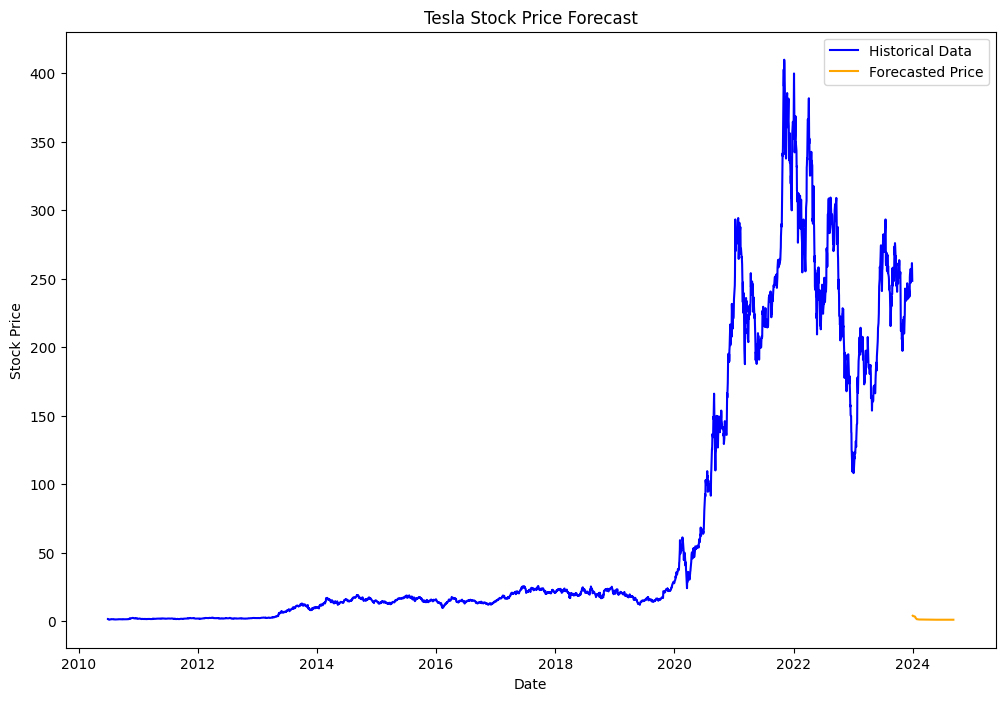

In [17]:
# Visualize the forecast
FutureMarketForecast_tesla.visualize_forecast()



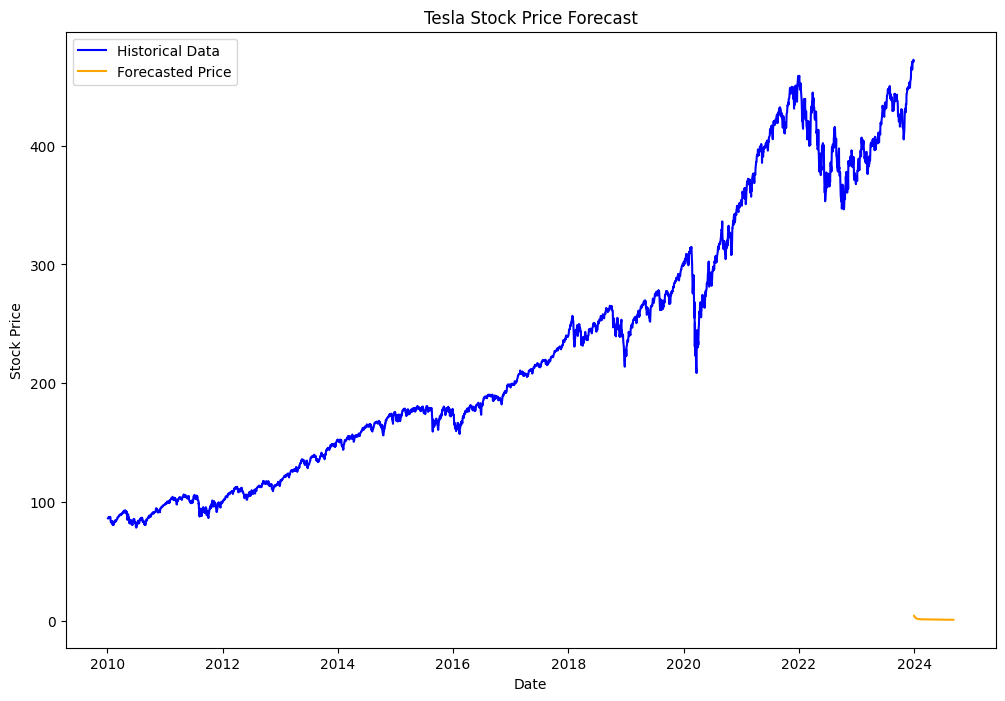

In [18]:
FutureMarketForecast_spy.visualize_forecast()

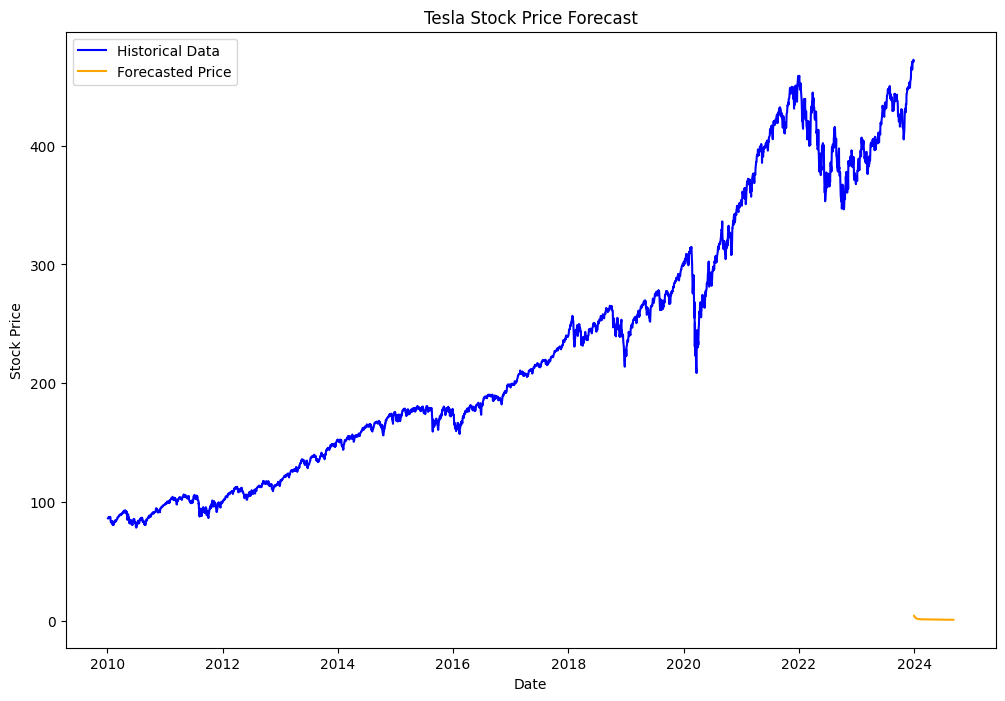

In [19]:
FutureMarketForecast_spy.visualize_forecast()

In [20]:
FutureMarketForecast_tesla.interpret_forecast()

---- Forecast Interpretation ----

1. Trend Analysis:
- The forecast indicates a consistent downward trend in stock prices.

2. Volatility and Risk Analysis:
- No confidence intervals available for volatility analysis.

3. Market Opportunities and Risks:
- Be cautious of potential market decline.


for BND data